# This notebook compares results of a spreadsheet emailed by Blanchard to PySulfSat

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None

In [13]:
df=pd.read_excel('Blanchard_Emailed_spreadsheet2.xlsx',
                 sheet_name='Test_1_Comp')

In [14]:
Calc_Blan=ss.calculate_B2021_SCSS(df=df, T_K=df['T_K'],
                                P_kbar=df['P_GPa']*10,
                                Fe_FeNiCu_Sulf=1)

In [15]:
Calc_Blan.head()

,SCSS_eq11,SCSS_eq12,Unnamed: 0,SiO2_Liq,MgO_Liq,FeOt_Liq,Al2O3_Liq,CaO_Liq,Cr2O3_Liq,TiO2_Liq,MnO_Liq,H2O_Liq,total,P_GPa,T_K,LnS,SCSS_eq11_Bl,Fe_FeNiCu,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,H2O_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,H2O_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_Fe3,Mg_Number_Liq_NoFe3
0,5836.414215,4578.369331,NaN,45.8,37.09,8.17,4.53,3.68,0.37,0.21,0.14,0.01,100.0,1,1927.7093,8.671797,5835.975239,1,0.398283,0.480831,0.001031,0.059416,0.034288,0.023214,0.0,0.0,0.001374,0.0,0.00029,0.001272,0.388654,0.469206,0.001006,0.05798,0.033459,0.045306,0.0,0.0,0.00134,0.0,0.000567,0.002482,0.890017,0.890017
1,5641.251438,4417.496845,NaN,45.8,37.09,8.17,4.53,3.68,0.37,0.21,0.14,0.01,100.0,2,1978.0544,8.637786,5640.827141,1,0.398283,0.480831,0.001031,0.059416,0.034288,0.023214,0.0,0.0,0.001374,0.0,0.00029,0.001272,0.388654,0.469206,0.001006,0.05798,0.033459,0.045306,0.0,0.0,0.00134,0.0,0.000567,0.002482,0.890017,0.890017
2,5439.414706,4253.184496,NaN,45.8,37.09,8.17,4.53,3.68,0.37,0.21,0.14,0.01,100.0,3,2025.1511,8.601352,5439.005590,1,0.398283,0.480831,0.001031,0.059416,0.034288,0.023214,0.0,0.0,0.001374,0.0,0.00029,0.001272,0.388654,0.469206,0.001006,0.05798,0.033459,0.045306,0.0,0.0,0.00134,0.0,0.000567,0.002482,0.890017,0.890017
3,5232.833989,4086.682303,NaN,45.8,37.09,8.17,4.53,3.68,0.37,0.21,0.14,0.01,100.0,4,2069.1152,8.562633,5232.440411,1,0.398283,0.480831,0.001031,0.059416,0.034288,0.023214,0.0,0.0,0.001374,0.0,0.00029,0.001272,0.388654,0.469206,0.001006,0.05798,0.033459,0.045306,0.0,0.0,0.00134,0.0,0.000567,0.002482,0.890017,0.890017
4,5023.194842,3919.080803,NaN,45.8,37.09,8.17,4.53,3.68,0.37,0.21,0.14,0.01,100.0,5,2110.0625,8.521746,5022.817032,1,0.398283,0.480831,0.001031,0.059416,0.034288,0.023214,0.0,0.0,0.001374,0.0,0.00029,0.001272,0.388654,0.469206,0.001006,0.05798,0.033459,0.045306,0.0,0.0,0.00134,0.0,0.000567,0.002482,0.890017,0.890017


Text(0, 0.5, 'Calc in pySulfSat (ppm)')

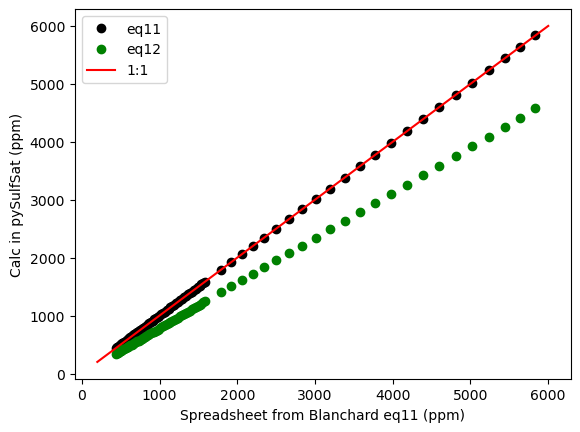

In [17]:
plt.plot(df['SCSS_eq11_Bl'],
         Calc_Blan['SCSS_eq11'],
         'ok', label='eq11')

plt.plot(df['SCSS_eq11_Bl'],
         Calc_Blan['SCSS_eq12'],
         'og', label='eq12')

plt.plot([200, 6000], [200, 6000], '-r', label='1:1')
plt.legend()
plt.xlabel('Spreadsheet from Blanchard eq11 (ppm)')
plt.ylabel('Calc in pySulfSat (ppm)')

## Show it also works using calculated sulfide compositions

In [ ]:
def calculate_sulfide_comp_generic(*,
Fe_Sulf=None, 